In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import expanduser

# Adapt Kmeans for Heldout

In [8]:
phonemes_by_kappa = ["b", "m", "B", "s", "D", "G", "w", "i", "y", "p", "r", "z", "t", "k", "rr", "a", "o", "l", "e", "n", "u", "c", "x", "d", "g", "N"]

In [9]:
models_dict = {
    "gmm" : {},
    "supervectors": {}
}

In [18]:
experiments_dir = expanduser("~") + "/tesis/informe-pronunciation/experiments/"
base_dir = experiments_dir + "gmm_vs_supervectors/heldout/"
adapt_kmeans_filename = base_dir + "heldout_adapt_kmeans/all_eers"
plots_dir = base_dir + "plots/"

In [14]:
def add_to_models_dict(model_key, filename):
    lines = []
    
    with open(filename, "r") as f:
        for line in f.readlines():
            lines.append(line.strip().split(":"))            
    
    lines_1 = [l[0] for l in lines]
    lines_2 = [float(l[1]) for l in lines]
    models_dict[model_key] = dict(zip(lines_1, lines_2))

In [15]:
add_to_models_dict("gmm", adapt_kmeans_filename)

## Supervectors

In [16]:
values = [0.133, 0.186, 0.179, 0.252, 0.185, 0.152, 0.141, 0.252, 0.371, 0.315, 0.331, 0.242, 0.323, 0.304, 0.341, 0.371, 0.387, 0.289, 0.392, 0.382, 0.355, 0.308, 0.135, 0.304, 0.236, 0.203]

In [17]:
models_dict["supervectors"] = dict(zip(phonemes_by_kappa, values))

# Dataframe

In [19]:
base_matrix = np.array(phonemes_by_kappa).reshape(-1,1)

In [20]:
for key in models_dict.keys():
    results = [models_dict[key][p] for p in phonemes_by_kappa]
    results = np.array(results).reshape(-1,1)
    base_matrix = np.hstack((base_matrix, results))

In [21]:
dataframe = pd.DataFrame(base_matrix[:, 1:], index=phonemes_by_kappa, columns=models_dict.keys())

In [22]:
output_filename = plots_dir + "gmm_vs_supervectors.csv"

In [23]:
dataframe.to_csv(output_filename, index_label="phones")

# Final plots

In [25]:
values_supervectors = [models_dict['supervectors'][p] for p in phonemes_by_kappa]
values_gmm = [models_dict['gmm'][p] for p in phonemes_by_kappa]

In [26]:
base_matrix = np.array(phonemes_by_kappa).reshape(-1,1)
base_matrix = np.column_stack((base_matrix, values_gmm))
base_matrix = np.column_stack((base_matrix, values_supervectors))

In [27]:
plot_dataframe = pd.DataFrame(base_matrix, columns=['phones', 'GMM', 'supervectors'])

In [28]:
df = pd.melt(plot_dataframe, id_vars="phones", var_name="model", value_name="EER")

In [29]:
df[['EER']] = df[['EER']].apply(pd.to_numeric)

In [30]:
output_filename = plots_dir + "gmm_vs_supervectors_heldout.png"

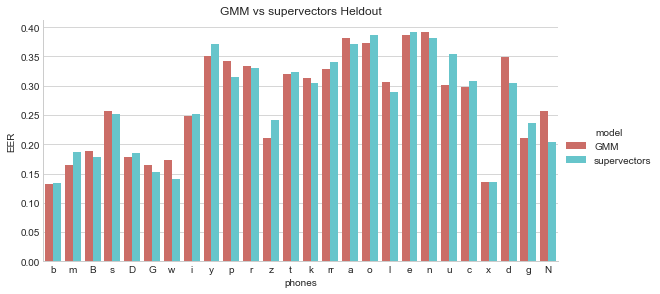

In [31]:
sns.set_style("whitegrid")
sns.factorplot(x='phones', y='EER', hue='model', data=df, kind='bar', size=4, aspect=2, palette="hls")
plt.title("GMM vs supervectors Heldout")
plt.savefig(output_filename)
plt.show()

# Barplots

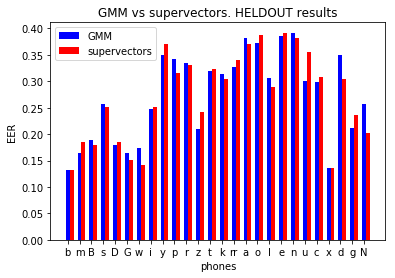

In [35]:
output_filename = base_dir + "plots/gmm_vs_supervectors_heldout.png"
title = "GMM vs supervectors. HELDOUT results"

barWidth = 0.4
xs_1 = np.arange(len(phonemes_by_kappa)) * 1.2
xs_2 = [x + barWidth for x in xs_1]

values_supervectors = [models_dict['supervectors'][p] for p in phonemes_by_kappa]
values_gmm = [models_dict['gmm'][p] for p in phonemes_by_kappa]
plt.bar(xs_1, values_gmm, width=barWidth, color="blue", label="GMM")
plt.bar(xs_2, values_supervectors, width=barWidth, color="red", label="supervectors")
plt.legend()
plt.xticks(xs_1, phonemes_by_kappa)
plt.ylabel("EER")
plt.xlabel("phones")
plt.title(title)
plt.savefig(output_filename)
plt.show()